In [1]:
# Turn off logging and disable tqdm this is a hidden cell on docs page
import logging
import os

logger = logging.getLogger('ibllib')
logger.setLevel(logging.CRITICAL)

os.environ["TQDM_DISABLE"] = "1"

# Plotting brain region values on cortical flatmap

This example walks through various ways to overlay brain region values on a cortical flatmap

## The dorsal cortex flatmap

The **dorsal_cortex** flatmap comprises a flattened volume of cortex up to depth 2000 um

<Axes: >

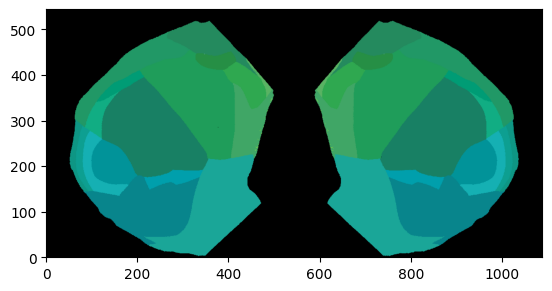

In [2]:
from iblatlas.flatmaps import FlatMap

res = 25
flmap = FlatMap(flatmap='dorsal_cortex', res_um=res)

# Plot flatmap at depth = 0 
flmap.plot_flatmap(int(0 / res))

<Axes: >

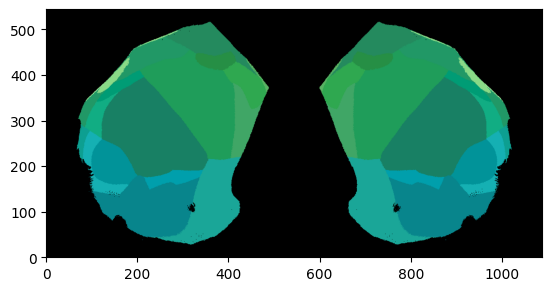

In [3]:
# Plot flatmap at depth = 800 um
flmap.plot_flatmap(int(800 / res))

## Data preparation

In order to plot brain regions values on the flatmap an array of acronyms and an array of values corresponding to each acronym must be provided. A detailed overview of how to prepare your data can be found [here](https://int-brain-lab.github.io/iblenv/notebooks_external/atlas_plotting_scalar_on_slice.html#Data-preparation)

In [4]:
import numpy as np
# prepare array of acronyms
acronyms = np.array(['ACAd1', 'ACAv1', 'AId1', 'AIp1', 'AIv1', 'AUDd1', 'AUDp1','AUDpo1', 'AUDv1', 
                     'SSp-m1', 'SSp-n1', 'SSp-tr1', 'SSp-ul1','SSp-un1', 'SSs1', 
                     'VISC1', 'VISa1', 'VISal1', 'VISam1', 'VISl1', 'VISli1', 'VISp1', 'VISp2/3', 'VISpl1', 'VISpm1', 
                     'SSp-n2/3', 'SSp-tr2/3', 'SSp-ul2/3', 'SSp-un2/3', 'SSs2/3',
                     'VISC2/3', 'VISa2/3', 'VISal2/3', 'VISam2/3', 'VISl2/3','VISli2/3', 'VISp2/3', 'VISpl1', 'VISpl2/3'])
# assign data to each acronym
values = np.arange(acronyms.size)

In [5]:
from iblatlas.regions import BrainRegions
br = BrainRegions()
# prepare array of acronyms with beryl mapping
acronyms_beryl = np.unique(br.acronym2acronym(acronyms, mapping='Beryl'))
values_beryl = np.arange(acronyms_beryl.size)

In [6]:
# prepare different values for left and right hemipshere for Beryl acronyms
values_beryl_lh = np.random.randint(0, 10, acronyms_beryl.size)
values_beryl_rh = np.random.randint(0, 10, acronyms_beryl.size)
values_beryl_lr = np.c_[values_beryl_lh, values_beryl_rh]

## Examples

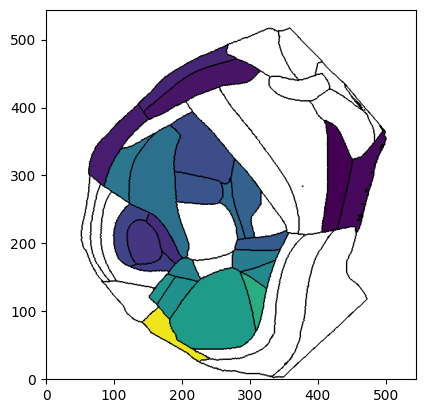

In [7]:
from iblatlas.plots import plot_scalar_on_flatmap

# Plot region values on the left hemisphere at depth=0um overlaid on boundary image using Allen mapping
fig, ax = plot_scalar_on_flatmap(acronyms, values, depth=0, mapping='Allen', hemisphere='left', background='boundary',
                                cmap='viridis', flmap_atlas=flmap)

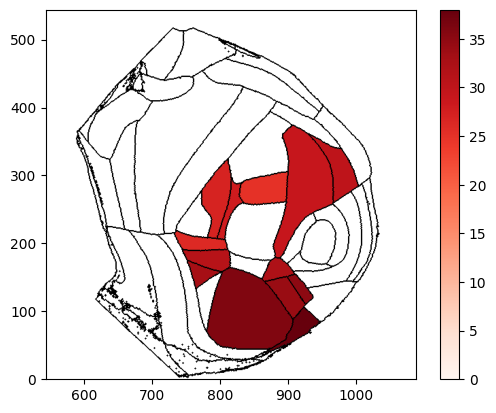

In [8]:
# Plot region values on the right hemisphere at depth=200um overlaid on boundary image using Allen mapping and show cbar
fig, ax, cbar = plot_scalar_on_flatmap(acronyms, values, depth=200, mapping='Allen', hemisphere='right', background='boundary',
                                cmap='Reds', flmap_atlas=flmap, show_cbar=True)

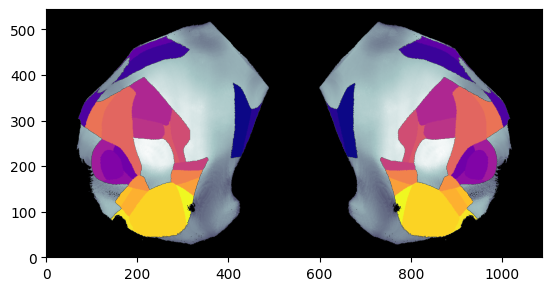

In [9]:
# Plot single column region values on the both hemisphere at depth=800um overlaid dwi Allen image using Beryl mapping
fig, ax = plot_scalar_on_flatmap(acronyms_beryl, values_beryl, depth=800, mapping='Beryl', hemisphere='both', 
                                 background='image', cmap='plasma', flmap_atlas=flmap)

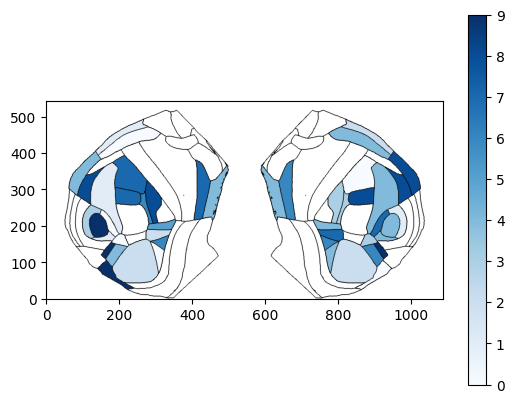

In [10]:
# Plot two column region values on the both hemispheres at depth=0um on boundary image using Allen mapping
fig, ax, cbar = plot_scalar_on_flatmap(acronyms_beryl, values_beryl_lr, depth=0, mapping='Beryl', hemisphere='both', 
                                      background='boundary', cmap='Blues', flmap_atlas=flmap, show_cbar=True)